In [1]:
import _3dTo2dSetup as D3
import numpy as np
from lineRenderAlgo import Bresenham3D
import math

In [2]:
SRC_TO_DETECTOR = 1167
SRC_TO_PATIENT = 705
DETECTOR_TO_PATIENT = SRC_TO_DETECTOR - SRC_TO_PATIENT
# used to determine box dimensions for projections
#MAG_FACTOR = SRC_TO_DETECTOR/SRC_TO_PATIENT
IMAGE_DIM = 735  # scale image dim down 1 to get centered image (since uneven)
#BOX_DIM = math.ceil(IMAGE_DIM/MAG_FACTOR)  # ~ 445
HALF_IMAGE_DIM = int((IMAGE_DIM - 1) / 2)


In [3]:
#steps 2 day

# 1 - create points 2 loop through and an image coresponding to said points
# 2 - preform bresenham between image and "forsviningspunkt"
# 3 - check if any points along said line are colored then color image repeat 2
# 4 - save image in folder to be used later


In [4]:
#create image with corrds
img_coords = np.empty([IMAGE_DIM,IMAGE_DIM],dtype=object)

for x in range(IMAGE_DIM):
  for y in range(IMAGE_DIM):
    img_coords[x,y] = (HALF_IMAGE_DIM-x, HALF_IMAGE_DIM-y)



In [5]:
test = np.zeros([5,5])
test[0,0] = 1
test[2,2] = 3
for i in img_coords[:5,:5]:
  print(i)
  #print(i[0],i[1])

[(367, 367) (367, 366) (367, 365) (367, 364) (367, 363)]
[(366, 367) (366, 366) (366, 365) (366, 364) (366, 363)]
[(365, 367) (365, 366) (365, 365) (365, 364) (365, 363)]
[(364, 367) (364, 366) (364, 365) (364, 364) (364, 363)]
[(363, 367) (363, 366) (363, 365) (363, 364) (363, 363)]


In [74]:
path = r"3dTo2d\solid_400001.nrrd"
box = D3.get3dFigure(445,path)

In [65]:
box.shape
#box2 = np.ones([445, 445,445])
##box2.shape

(445, 445, 445)

In [75]:
#preform bresenham -> locate box -> check if points in box are colored
d_to_p, s_to_p, box_dim = DETECTOR_TO_PATIENT,SRC_TO_PATIENT,445

#box = np.ones([box_dim, box_dim,box_dim])
img = np.zeros([IMAGE_DIM,IMAGE_DIM])

box_dim_half = int((box_dim - 1) / 2)

#loop all image coords
for x in range(IMAGE_DIM):#-IMAGE_DIM+3):
  for y in range(IMAGE_DIM):#-IMAGE_DIM+3):
    #create line of points
    points = Bresenham3D(-d_to_p, 0, 0, s_to_p,img_coords[x, y][0], img_coords[x, y][1])
    #get points within box
    points_in_box = D3.getPointsInBox(points,box_dim)
    #check if any points in box are colord/a figure
    #print(points)
    #print("-.-----")
    #print(points_in_box)
    #print("-.-----")
    for i in points_in_box:
      #convert real coord to box coord
      xb = i[0] + box_dim_half
      yb = i[1] + box_dim_half
      zb = i[2] + box_dim_half

      #print(xb,yb,zb)
      if (box[xb,yb,zb] == 1):
        #if point found just go next
        img[x,y] = int(1)
        #print("placed")
        break
  print("done wiht;", x)

    


done wiht; 0
done wiht; 1
done wiht; 2
done wiht; 3
done wiht; 4
done wiht; 5
done wiht; 6
done wiht; 7
done wiht; 8
done wiht; 9
done wiht; 10
done wiht; 11
done wiht; 12
done wiht; 13
done wiht; 14
done wiht; 15
done wiht; 16
done wiht; 17
done wiht; 18
done wiht; 19
done wiht; 20
done wiht; 21
done wiht; 22
done wiht; 23
done wiht; 24
done wiht; 25
done wiht; 26
done wiht; 27
done wiht; 28
done wiht; 29
done wiht; 30
done wiht; 31
done wiht; 32
done wiht; 33
done wiht; 34
done wiht; 35
done wiht; 36
done wiht; 37
done wiht; 38
done wiht; 39
done wiht; 40
done wiht; 41
done wiht; 42
done wiht; 43
done wiht; 44
done wiht; 45
done wiht; 46
done wiht; 47
done wiht; 48
done wiht; 49
done wiht; 50
done wiht; 51
done wiht; 52
done wiht; 53
done wiht; 54
done wiht; 55
done wiht; 56
done wiht; 57
done wiht; 58
done wiht; 59
done wiht; 60
done wiht; 61
done wiht; 62
done wiht; 63
done wiht; 64
done wiht; 65
done wiht; 66
done wiht; 67
done wiht; 68
done wiht; 69
done wiht; 70
done wiht; 71
do

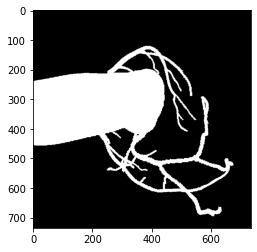

In [76]:
import matplotlib.pyplot as plt

#plt.imshow(box[100],cmap="gray")
plt.imshow(img,cmap="gray")
plt.show()